In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_2016 = pd.read_csv('Resources/data/train_data_2016.csv')
data_2017 = pd.read_csv('Resources/data/test_data_2017.csv')

In [3]:
data1 = pd.concat([data_2016, data_2017], ignore_index=True)

C:\Users\rebec\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
data1.year.value_counts()

2016    241
2017    195
Name: year, dtype: int64

In [5]:
data = pd.get_dummies(data1, columns=['production','rating'], drop_first = True)
data.head()

,box_office,country,genre,runtime,title,year,production_21 Laps Entertainment,production_A Day in the Life Films,production_A24,production_A24 Films,...,production_Wet Paint Production,production_Will Packer Productions,production_Working Title,production_XYZ Films,production_Yale Productions,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated
0,248849,1,3,94,Dean,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,59481553,1,5,103,10 Cloverfield Lane,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,37978162,3,5,144,13 Hours,2016,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5663854,1,2,119,20th Century Women,2016,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,29245,1,1,0,3 Weeks in Yerevan,2016,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
train = data.loc[data.year == 2016]
test = data.loc[data.year == 2017]

In [7]:
X_train = train[train.columns[~train.columns.isin(['box_office','title', 'year'])]]
y_train = train['box_office'].values.reshape(-1,1)

X_test = test[test.columns[~test.columns.isin(['box_office','title', 'year'])]]
y_test = test['box_office'].values.reshape(-1,1)

In [8]:
print(X_test.shape, y_test.shape)

(195, 199) (195, 1)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6194696939899448
Testing Data Score: 0.44307599436561024


Text(0.5, 1.0, 'Residual Plot')

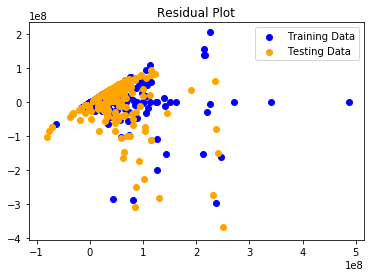

In [12]:
### BEGIN SOLUTION
fig3, ax3 = plt.subplots()
ax3.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
ax3.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
ax3.legend()
ax3.set_title("Residual Plot")
### END SOLUTION  Out [7]:  Text(0.5,1,'Residual Plot')

In [13]:
fig3.savefig('Resources/images/residual_plot.png', figsize=(1044/166, 696/166), dpi=166)

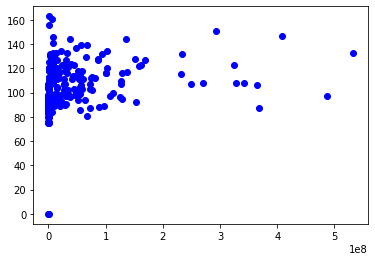

In [14]:
fig2, ax2 = plt.subplots()
ax2.scatter(y_train, X_train['runtime'], c="blue", label="Train Data")

In [15]:
fig2.savefig('Resources/images/train_scatter.png', figsize=(1044/166, 696/166), dpi=166)

In [16]:
from scipy import stats
import numpy as np

In [17]:
box_office = data['box_office']
runtime = data['runtime']

In [18]:
runtime = runtime.astype(np.float64) 
box_office = box_office.astype(np.float64)

In [19]:
bo_slope, bo_int, bo_r, bo_p, bo_std_err = stats.linregress(
    runtime, box_office)
bo_fit = bo_slope * runtime + bo_int

stats.linregress(runtime, box_office)

LinregressResult(slope=1229000.795341421, intercept=-81474722.97531587, rvalue=0.3018815223084715, pvalue=1.2255023475009007e-10, stderr=186303.52230369207)

Text(0.5, 0, 'Runtime (mins)')

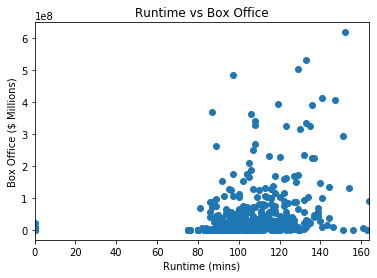

In [20]:
fig, ax = plt.subplots()
ax.set_xlim(min(data['runtime']), max(data['runtime']))
ax.plot(data['runtime'], data['box_office'], linewidth=0, marker="o")
ax.set_title("Runtime vs Box Office")
ax.set_ylabel("Box Office ($ Millions)")
ax.set_xlabel("Runtime (mins)")

In [21]:
fig.savefig('Resources/images/runtime_bo.png', figsize=(1044/166, 696/166), dpi=166)

In [22]:
box_office = data['box_office']
genre = data['genre']

In [23]:
genre = genre.astype(np.float64) 
box_office = box_office.astype(np.float64)

In [24]:
gn_slope, gn_int, gn_r, gn_p, gn_std_err = stats.linregress(
    genre, box_office)
gn_fit = gn_slope * runtime + gn_int

stats.linregress(genre, box_office)

LinregressResult(slope=18783004.49462893, intercept=-8576971.783309586, rvalue=0.28608990356380276, pvalue=1.1706575559854045e-09, stderr=3019778.5278837783)

Text(0.5, 0, 'Genre (# of categories)')

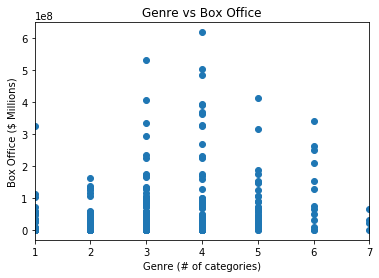

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_xlim(min(data['genre']), max(data['genre']))
ax1.plot(data['genre'], data['box_office'], linewidth=0, marker="o")
# ax1.plot(data['genre'], gn_fit, "r--", linewidth=1)
ax1.set_title("Genre vs Box Office")
ax1.set_ylabel("Box Office ($ Millions)")
ax1.set_xlabel("Genre (# of categories)")

In [26]:
fig1.savefig('Resources/images/genre_bo.png', figsize=(1044/166, 696/166), dpi=166)

Text(0.5, 0.98, '')

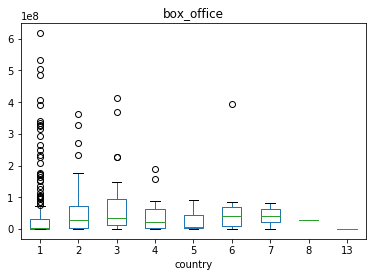

In [46]:
country = data.boxplot(by= 'country', column='box_office', grid=False)
fig = country.get_figure()
fig.suptitle("")

In [47]:
country.figure.savefig('Resources/images/country_bo.png', figsize=(1044/166, 696/166), dpi=166)

Text(0.5, 0.98, '')

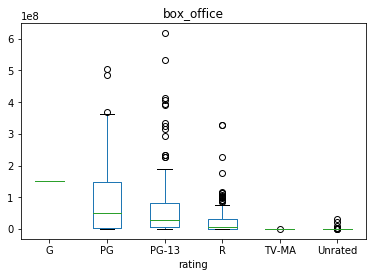

In [48]:
rating = data1.boxplot(by='rating', column='box_office',grid=False)
fig = rating.get_figure()
fig.suptitle("")

In [49]:
rating.figure.savefig('Resources/images/rating_bo.png', figsize=(1044/166, 696/166), dpi=166)

In [50]:
data1.production.value_counts()

Warner Bros. Pictures                             28
20th Century Fox                                  23
Paramount Pictures                                19
Universal Pictures                                17
Walt Disney Pictures                              15
                                                  ..
Superlative Films / Depth of Field Productions     1
Miramax/Broad Green                                1
Power of 3                                         1
Screen Media Films                                 1
Hurricane Films                                    1
Name: production, Length: 192, dtype: int64

In [51]:
filter_list = ['Warner Bros. Pictures','20th Century Fox','Paramount Pictures','Universal Pictures','Walt Disney Pictures']
data1 = data1[data1.production.isin(filter_list)]
data1

,box_office,country,genre,production,rating,runtime,title,year
2,37978162,3,5,Paramount Pictures,R,144,13 Hours,2016
7,8103139,2,6,20th Century Fox,R,146,A Cure for Wellness,2016
12,77037635,2,3,Walt Disney Pictures,PG,113,Alice Through the Looking Glass,2016
13,40069087,2,5,Paramount Pictures,R,124,Allied,2016
22,54645723,6,3,20th Century Fox,PG-13,115,Assassin's Creed,2016
25,54014580,1,2,Warner Bros. Pictures,PG-13,111,Barbershop: The Next Cut,2016
27,293792936,1,3,Warner Bros. Pictures,PG-13,151,Batman v Superman: Dawn of Justice,2016
30,26384681,1,4,Paramount Pictures,PG-13,123,Ben-Hur,2016
43,408080554,1,3,Walt Disney Pictures,PG-13,147,Captain America: Civil War,2016
46,127380061,2,3,Warner Bros. Pictures,PG-13,107,Central Intelligence,2016


Text(0.5, 0.98, '')

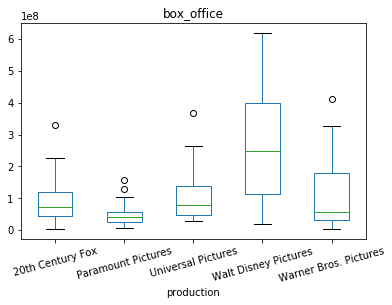

In [54]:
boxplot2 = data1.boxplot(by='production', column='box_office',grid=False, rot =15)
fig = boxplot2.get_figure()
fig.suptitle("")

In [55]:
boxplot2.figure.savefig('Resources/images/production_bo.png', figsize=(1044/166, 696/166), dpi=166)